# Import Libraries

In [1]:
import keras 
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPool2D
from keras import backend as k

In [2]:
batch_size = 128
num_classes = 10
epochs = 12

In [3]:
#input image dimensions
img_rows, img_cols = 28,28

# Load dataset - Fashion_msnit

In [30]:
#load fashion_mnist dataset from keras
from keras.datasets import fashion_mnist

#download mnist data and split into train and test data
(xtrain,ytrain),(xtest,ytest) = fashion_mnist.load_data()

In [31]:
print('Training set images shape: {}'.format(xtrain.shape))
print('Training set labels shape: {}'.format(ytrain.shape))
print()
print('Testing set images shape: {}'.format(xtest.shape))
print('Testing set labels shape: {}'.format(ytest.shape))

Training set images shape: (60000, 28, 28)
Training set labels shape: (60000,)

Testing set images shape: (10000, 28, 28)
Testing set labels shape: (10000,)


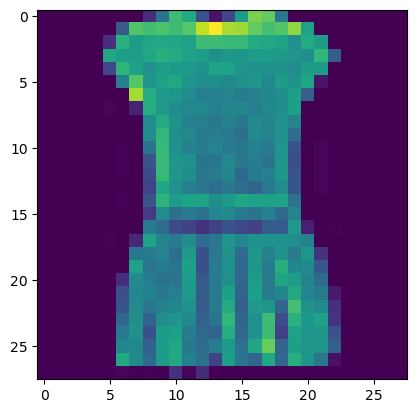

In [32]:
import matplotlib.pyplot as plt

plt.imshow(xtrain[3])

# Data-Preprocessing

Reshape data to Fil mode

In [33]:
#reshape data to fil mode

xtrain = xtrain.reshape(xtrain.shape[0],img_rows,img_cols,1)
xtest = xtest.reshape(xtest.shape[0],img_rows,img_cols,1)
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


# Convert into flaot

In [34]:
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

# Convert into 0 & 1

In [35]:
xtrain/=255
xtest/=255

In [36]:
xtest[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [37]:
print('xtrain shape:',xtrain.shape)
print(xtrain.shape[0],'train samples')
print(xtest.shape[0],'test samples')

xtrain shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [38]:
ytrain = keras.utils.to_categorical(ytrain)
ytest = keras.utils.to_categorical(ytest)

In [39]:
ytrain[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Build the CNN Model

In [40]:
model = Sequential()

#add model layers
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Dropout(0.2))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

#output layer
model.add(Dense(10,activation='softmax'))

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 dropout_1 (Dropout)         (None, 26, 26, 64)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                46090     
                                                      

# Compile the Model

In [42]:
#Compile

model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy']
             )

# Run the Model

In [43]:
#run the model

result = model.fit(xtrain,ytrain,batch_size=batch_size,epochs=10,verbose=1,
                   validation_data=(xtest,ytest)
                  )

Epoch 1/10
469/469 [==============================] - 166s 352ms/step - loss: 0.5101 - accuracy: 0.8205 - val_loss: 0.3970 - val_accuracy: 0.8609
Epoch 2/10
469/469 [==============================] - 273s 582ms/step - loss: 0.3298 - accuracy: 0.8841 - val_loss: 0.3254 - val_accuracy: 0.8856
Epoch 3/10
469/469 [==============================] - 233s 496ms/step - loss: 0.2854 - accuracy: 0.8983 - val_loss: 0.2981 - val_accuracy: 0.8958
Epoch 4/10
469/469 [==============================] - 162s 346ms/step - loss: 0.2614 - accuracy: 0.9074 - val_loss: 0.2899 - val_accuracy: 0.8983
Epoch 5/10
469/469 [==============================] - 161s 343ms/step - loss: 0.2415 - accuracy: 0.9129 - val_loss: 0.2905 - val_accuracy: 0.8952
Epoch 6/10
469/469 [==============================] - 158s 337ms/step - loss: 0.2262 - accuracy: 0.9181 - val_loss: 0.2604 - val_accuracy: 0.9067
Epoch 7/10
469/469 [==============================] - 157s 335ms/step - loss: 0.2117 - accuracy: 0.9239 - val_loss: 0.2710 -

# Print the Test Loss & Accuracy

In [44]:
score = model.evaluate(xtest,ytest,verbose=0)
print('Test loss:',score[0])
print()
print('Test Accuracy:',score[1])

Test loss: 0.2556489109992981

Test Accuracy: 0.9115999937057495


# Plot the Graph for training and Validation for loss & Accuracy

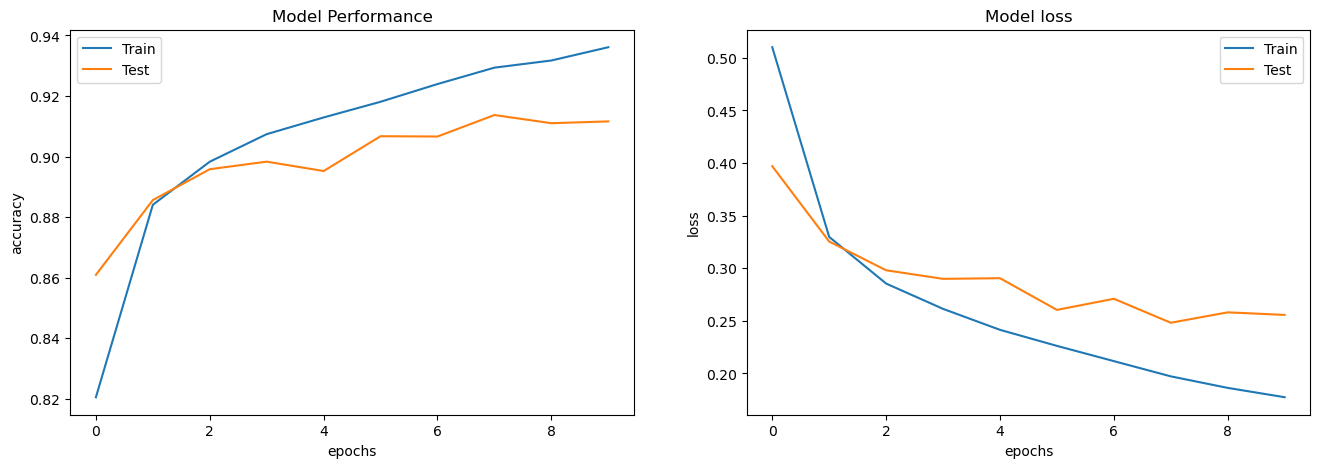

In [45]:
import matplotlib.pyplot as plt
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize = (16,5))

#plot training and validation accuracy values

ax1.plot(result.history['accuracy'])
ax1.plot(result.history['val_accuracy'])

ax1.set_title('Model Performance')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epochs')
ax1.legend(['Train','Test'])



#plot training and validation loss values

ax2.plot(result.history['loss'])
ax2.plot(result.history['val_loss'])

ax2.set_title('Model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epochs')
ax2.legend(['Train','Test'])

In [48]:
ypred=model.predict(xtest[:4])
ypred

1/1 [==============================] - 0s 41ms/step


array([[3.8527148e-08, 2.8742343e-12, 8.8352454e-09, 7.4359296e-11,
        3.9635415e-09, 2.8993480e-04, 7.9221635e-08, 2.8333953e-04,
        7.6752767e-06, 9.9941897e-01],
       [9.5635717e-04, 9.0187502e-10, 9.9560046e-01, 1.4573214e-09,
        2.5527640e-03, 4.0773865e-13, 8.9042581e-04, 2.8207506e-15,
        3.1950609e-08, 3.7276553e-11],
       [1.2338982e-07, 9.9999976e-01, 3.4333592e-08, 2.4656166e-09,
        1.5972138e-09, 2.9559267e-08, 3.1435384e-08, 3.7105673e-13,
        1.2736212e-09, 3.6942702e-12],
       [4.1120921e-07, 9.9999416e-01, 6.2744121e-10, 2.0753641e-06,
        3.3054562e-06, 1.3404566e-08, 1.2939186e-07, 7.9412796e-12,
        7.4523276e-10, 1.1300374e-09]], dtype=float32)

In [49]:
ytest[:4]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)